<a href="https://colab.research.google.com/github/lazybuttrying/TensorFlow-Certificate/blob/main/C4/W2/ungraded_labs/C4_W2_Lab_1_features_and_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

# window를 이용해 x,y series data 만들기

2.6.0


# Time Window
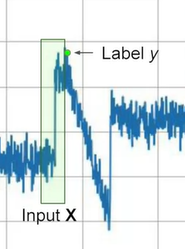

In [2]:
dataset = tf.data.Dataset.range(10)
for val in dataset:
   print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [3]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1) # window의 크기, 한 발짝의 움직에 거리
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print() # window 크기보다 적게 남아도 계속 진행

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [4]:
dataset = tf.data.Dataset.range(10)
# drop_remainder = True: truncate the data by dropping remainders
# window 크기보다 적게 남으면 멈춤
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print() # 

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [5]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
  print(window.numpy()) # window에 바로 numpy() 씌우는 걸 선호


[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [6]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
# 마지막은 label로 그전까지만 X로
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
  print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [7]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
# shuffle : 데이터 속 개수만큼 buffer_size를 지정
# label을 섞음
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
  print(x.numpy(), y.numpy())


[0 1 2 3] [4]
[2 3 4 5] [6]
[3 4 5 6] [7]
[1 2 3 4] [5]
[5 6 7 8] [9]
[4 5 6 7] [8]


In [8]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
# 2개의 항목을 가진 3개의 batch 생성
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())


x =  [[2 3 4 5]
 [5 6 7 8]]
y =  [[6]
 [9]]
x =  [[3 4 5 6]
 [1 2 3 4]]
y =  [[7]
 [5]]
x =  [[4 5 6 7]
 [0 1 2 3]]
y =  [[8]
 [4]]


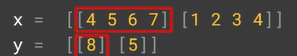

Sequnce Bias는 선택이 항목 순서에 영향을 줄 때 생깁니다.

예를 들어 내가 좋아하는 TV 프로그램을 물어보고 "왕좌의 게임", "킬링 이브", "트래블러", "닥터 후"의 순서로 나열하면 '왕좌의 게임'을 선택할 가능성이 더 큽니다. '왕좌'는 여러분이 잘 알고 계시며 가장 먼저 보게 되는 것입니다. 다른 TV 프로그램과 동일하더라도. 따라서 데이터 세트의 데이터를 훈련할 때 시퀀스가 ​​비슷한 방식으로 훈련에 영향을 미치는 것을 원하지 않으므로 섞는 것이 좋습니다.

